In [88]:
import os
%run train_toycar.py

FILEHOME = os.path.abspath(os.path.curdir)
datapath = FILEHOME + '/../data_output_50Hz.txt'
solverpath = FILEHOME + '/toycar_solver.prototxt'
structurepath = FILEHOME + '/toycar_2fc_hdf5.prototxt'
deploypath = FILEHOME + '/toycar_2fc_deploy.prototxt'
weightspath = FILEHOME + '/2fc_iter_20001.caffemodel'
mlp = Network(datapath, solverpath, structurepath, deploypath, weightspath)


done Reading


In [80]:
mlp.get_predicted_outputs(np.array([[0,0,0,0,0,0,0,0]]))[0].shape

(1, 5)

In [89]:
pred = mlp.test(mlp.test_data[:10000,:])

In [91]:
print pred.shape

(10000, 5)


In [93]:
pred_diff = np.sum(np.abs(pred - mlp.test_labels[:10000,:]), axis=1)


In [94]:
pred_diff

array([ 0.00347998,  0.00225984,  0.00292104, ...,  0.00187536,
        0.00595344,  0.00185717])

In [99]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

<matplotlib.colorbar.Colorbar instance at 0x7fe6805c5758>

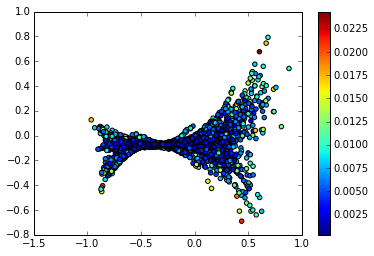

In [110]:
c = plt.scatter(mlp.test_data[:10000,0],mlp.test_data[:10000,1], 
            label=pred_diff, c=pred_diff)
plt.colorbar(c)

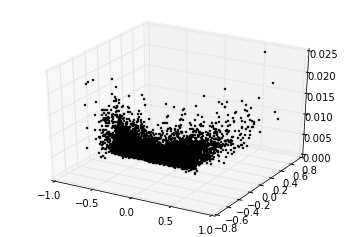

In [105]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(mlp.test_data[:10000,0],mlp.test_data[:10000,1],
       pred_diff, 'o', , ms=2)

In [112]:
np.max(mlp.start_states,axis=0)

array([ 5.49607182,  2.73296952,  1.38655531,  2.98226047,  0.59353274], dtype=float32)

In [124]:
%run train_toycar.py

In [125]:
model = Model(datapath)

done Reading


In [126]:
mlp = Network(model, solverpath, structurepath, deploypath, weightspath)

array([[ -3.75082179e-03,  -8.53481223e-02,  -5.04392873e-03, ...,
         -8.92972164e-01,   8.13890777e-01,   2.00000000e-02],
       [ -4.70862502e-01,  -8.51999186e-02,   1.30440226e-01, ...,
          2.77807794e-02,  -5.27858253e-04,   2.00000000e-02],
       [ -5.90810362e-01,  -1.35207814e-01,   3.14612926e-01, ...,
         -2.39577075e-03,  -4.90433853e-01,   2.00000000e-02],
       ..., 
       [ -4.40512417e-01,  -6.93591603e-02,   1.16642289e-02, ...,
          6.50690429e-01,  -9.45059315e-01,   2.00000000e-02],
       [ -3.67331049e-01,  -7.27096033e-02,   4.58631388e-02, ...,
          4.22492001e-01,  -7.17959952e-01,   2.00000000e-02],
       [ -7.34015162e-01,  -6.71093667e-03,  -5.86692331e-02, ...,
         -9.32095609e-02,   4.48669649e-01,   2.00000000e-02]])